As you understand each feature, you want to pay attention to any features that:


Dictionary <a>https://docs.google.com/spreadsheets/d/191B2yJ4H1ZPXq0_ByhUgWMFZOYem5jFz0Y3by_7YBY4/edit#gid=2081333097</a>


- leak information from the future (after the loan has already been funded)
- don't affect a borrower's ability to pay back a loan (e.g. a randomly generated ID value by Lending Club)
- formatted poorly and need to be cleaned up
- require more data or a lot of processing to turn into a useful feature
- contain redundant information
We need to especially pay attention to data leakage, since it can cause our model to overfit. This is because the model would be using data about the target column that wouldn't be available when we're using the model on future loans.

- keep in mind that we need to select one of the columns as the target column we want to use when we move on to the machine learning phase

In [2]:
import pandas as pd
loans_2007 =pd.read_csv('loans_2007.csv')
loans_2007.head()

C:\Users\Oluwabusayo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


## Columns exploration
- We have 52 columns

### Split Columns and filter manually
- First group below(19)

In [3]:
loans_2007.columns[:19]

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose'],
      dtype='object')

### Drop these columns(Part 1)

- `id`: randomly generated field by Lending Club for unique identification purposes only 
- `member_id`: also a randomly generated field by Lending Club for unique identification purposes only
- `funded_amnt`: leaks data from the future (after the loan is already started to be funded)
- `funded_amnt_inv`: also leaks data from the future (after the loan is already started to be funded)
- `grade`: contains redundant information as the interest rate column (int_rate)
- `sub_grade`: also contains redundant information as the interest rate column (int_rate)
- `emp_title`: requires other data and a lot of processing to potentially be useful
- `issue_d`: leaks data from the future (after the loan is already completely funded)

While the `grade` and `sub_grade` values are categorical, the `int_rate` column contains continuous values, which are better suited for machine learning.

In [4]:
loans_2007 = loans_2007.drop(["id", "member_id", "funded_amnt", "funded_amnt_inv", "grade", "sub_grade", "emp_title", "issue_d"], axis=1)

### Part 2

- `zip_code`: redundant with the addr_state column since only the first 3 digits of the 5 digit zip code are visible (which only can be used to identify the state the borrower lives in)
- `out_prncp`: leaks data from the future, (after the loan already started to be paid off)
- `out_prncp_inv`: also leaks data from the future, (after the loan already started to be paid off)
- `total_pymnt`: also leaks data from the future, (after the loan already started to be paid off)
- `total_pymnt_inv`: also leaks data from the future, (after the loan already started to be paid off)
- `total_rec_prncp`: also leaks data from the future, (after the loan already started to be paid off)

In [5]:
loans_2007 = loans_2007.drop(["zip_code", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp"], axis=1)

### Part 3

- `total_rec_int`: leaks data from the future, (after the loan already started to be paid off),
- `total_rec_late_fee`: also leaks data from the future, (after the loan already started to be paid off),
- `recoveries`: also leaks data from the future, (after the loan already started to be paid off),
- `collection_recovery_fee`: also leaks data from the future, (after the loan already started to be paid off),
- `last_pymnt_d`: also leaks data from the future, (after the loan already started to be paid off),
- `last_pymnt_amnt`: also leaks data from the future, (after the loan already started to be paid off).

In [6]:
loans_2007 = loans_2007.drop(["total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt"], axis=1)
print(loans_2007.iloc[0])
print(loans_2007.shape[1])

loan_amnt                            5000
term                            36 months
int_rate                           10.65%
installment                        162.87
emp_length                      10+ years
home_ownership                       RENT
annual_inc                          24000
verification_status              Verified
loan_status                    Fully Paid
pymnt_plan                              n
purpose                       credit_card
title                            Computer
addr_state                             AZ
dti                                 27.65
delinq_2yrs                             0
earliest_cr_line                 Jan-1985
inq_last_6mths                          1
open_acc                                3
pub_rec                                 0
revol_bal                           13648
revol_util                          83.7%
total_acc                               9
initial_list_status                     f
last_credit_pull_d               J

In [7]:
loans_2007.head(5)

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,Fully Paid,n,...,f,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,...,f,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,2400.0,36 months,15.96%,84.33,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,...,f,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,10000.0,36 months,13.49%,339.31,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,...,f,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,3000.0,60 months,12.69%,67.79,1 year,RENT,80000.0,Source Verified,Current,n,...,f,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


We should use the `loan_status` column, since it's the only column that directly describes if a loan was paid off on time, had delayed payments, or was defaulted on the borrower. 
- Currently, this column contains text values and we need to convert it to a numerical one for training a model. Let's explore the different values in this column and come up with a strategy for converting the values in this column.

In [8]:
loans_2007['loan_status'].value_counts()

Fully Paid                                             33136
Charged Off                                             5634
Does not meet the credit policy. Status:Fully Paid      1988
Current                                                  961
Does not meet the credit policy. Status:Charged Off      761
Late (31-120 days)                                        24
In Grace Period                                           20
Late (16-30 days)                                          8
Default                                                    3
Name: loan_status, dtype: int64

- From the investor's perspective, we're interested in trying to predict which loans will be paid off on time and which ones won't be. Only the `Fully Paid` and `Charged Off``Fully Paid` and `Charged Off` values describe the final outcome of the loan.

- Let's remove all the loans that don't contain either `Fully Paid` and `Charged Off` as the loan's status and then transform the Fully Paid values to 1 for the positive case and the Charged Off values to 0 for the negative case

In [9]:
loans_2007 = loans_2007[(loans_2007['loan_status']=='Fully Paid') | (loans_2007['loan_status']=='Charged Off')]

status_replace = {
    "loan_status" : {
        "Fully Paid": 1,
        "Charged Off": 0,
    }
}

loans_2007 = loans_2007.replace(status_replace)

### Look for rows with 1 unique value
- We'll need to compute the number of unique values in each column and drop the columns that contain only one unique value.
- `tax_liens` has only a unique value throughout.

In [10]:
loans_2007['tax_liens'].unique()

array([ 0., nan])

In [11]:
listo = []
for i in loans_2007.columns:
    x = loans_2007[i].dropna().unique()  #we've not yet dropped the null values
    if len(x) == 1:
        listo.append(i)
loans_2007 = loans_2007.drop(listo, axis=1)
listo



['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [12]:
print(loans_2007.columns[loans_2007.isnull().sum() > 0])
loans_2007.isnull().sum()

Index(['emp_length', 'title', 'revol_util', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')


loan_amnt                  0
term                       0
int_rate                   0
installment                0
emp_length              1036
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
title                     11
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64

- Domain knowledge tells us that employment length is frequently used in assessing how risky a potential borrower is, so we'll keep this column despite its relatively large amount of missing values.
- We'llinspect the values of the column pub_rec_bankruptcies


In [13]:
loans_2007['pub_rec_bankruptcies'].value_counts(normalize = True)

0.0    0.956636
1.0    0.043233
2.0    0.000131
Name: pub_rec_bankruptcies, dtype: float64

We see that this column offers very little variability, nearly 94% of values are in the same category
- Hence we'll drop it'
- We'll then drop  any rows with missing values in all rows

In [14]:
loans_2007.drop('pub_rec_bankruptcies', inplace = True, axis= 1)




In [16]:
c =['emp_length', 'title', 'revol_util', 'last_credit_pull_d']
loans_2007 = loans_2007.dropna(subset=c)
loans_2007.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
title                  0
addr_state             0
dti                    0
delinq_2yrs            0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
last_credit_pull_d     0
dtype: int64

### Selecting possible text columns

- Print the first row of each columns to have idea of text

In [21]:
object_columns_df = loans_2007.select_dtypes(include=["object"])
print(object_columns_df.iloc[0])

term                     36 months
int_rate                    10.65%
emp_length               10+ years
home_ownership                RENT
verification_status       Verified
purpose                credit_card
title                     Computer
addr_state                      AZ
earliest_cr_line          Jan-1985
revol_util                   83.7%
last_credit_pull_d        Jun-2016
Name: 0, dtype: object


Part 1
- Firstly we'll examine rows with purely text content

In [23]:

cols = ['home_ownership', 'verification_status', 'emp_length', 'term', 'addr_state']
for c in cols:
    print(loans_2007[c].value_counts())

RENT        18112
MORTGAGE    16686
OWN          2778
OTHER          96
NONE            3
Name: home_ownership, dtype: int64
Not Verified       16281
Verified           11856
Source Verified     9538
Name: verification_status, dtype: int64
10+ years    8545
< 1 year     4513
2 years      4303
3 years      4022
4 years      3353
5 years      3202
1 year       3176
6 years      2177
7 years      1714
8 years      1442
9 years      1228
Name: emp_length, dtype: int64
 36 months    28234
 60 months     9441
Name: term, dtype: int64
CA    6776
NY    3614
FL    2704
TX    2613
NJ    1776
IL    1447
PA    1442
VA    1347
GA    1323
MA    1272
OH    1149
MD    1008
AZ     807
WA     788
CO     748
NC     729
CT     711
MI     678
MO     648
MN     581
NV     466
SC     454
WI     427
OR     422
AL     420
LA     420
KY     311
OK     285
KS     249
UT     249
AR     229
DC     209
RI     194
NM     180
WV     164
HI     162
NH     157
DE     110
MT      77
WY      76
AK      76
SD      60
VT  

In [25]:
print(loans_2007['purpose'].value_counts())
print(loans_2007["title"].value_counts())


debt_consolidation    17751
credit_card            4911
other                  3711
home_improvement       2808
major_purchase         2083
small_business         1719
car                    1459
wedding                 916
medical                 655
moving                  552
house                   356
vacation                348
educational             312
renewable_energy         94
Name: purpose, dtype: int64
Debt Consolidation                      2068
Debt Consolidation Loan                 1599
Personal Loan                            624
Consolidation                            488
debt consolidation                       466
                                        ... 
great                                      1
American Express Debt payment              1
Twilight Zone Pinball Machine              1
Freeing Myself From Credit Card Debt       1
my fast loan                               1
Name: title, Length: 18881, dtype: int64


- The `home_ownership`, `verification_status`, `emp_length`, and `term columns` each contain a few discrete categorical values

    - Discrete i.e They cannot be rated into -1.0
    - Categorical - They imply categories
- It seems like the purpose and title columns do contain overlapping information but we'll keep the purpose column since it contains a few discrete values.

#### To drop
- We'll remove the `last_credit_pull_d`,  and `earliest_cr_line` as it isnt so useful for us
- `addr_state`, has too much unique values, and relates to title `title`.
- `title` also has several modifications of same words and will take a lot cleaning
#### To clean
- `int_rate` and `revol_util` columns to float columns
- `emp_length` consist of years max 10+, we'll reformat to numbers

In [26]:
loans_2007 = loans_2007.drop(['last_credit_pull_d', 'addr_state', 'title','earliest_cr_line'], axis = 1)
loans_2007['int_rate']= loans_2007['int_rate'].str.rstrip('%').astype('float')
loans_2007['revol_util']= loans_2007['revol_util'].str.rstrip('%').astype('float')
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0
    }
}
loans_2007 =loans_2007.replace(mapping_dict)
loans_2007.iloc[0]

loan_amnt                     5000
term                     36 months
int_rate                     10.65
installment                 162.87
emp_length                      10
home_ownership                RENT
annual_inc                   24000
verification_status       Verified
loan_status                      1
purpose                credit_card
dti                          27.65
delinq_2yrs                      0
inq_last_6mths                   1
open_acc                         3
pub_rec                          0
revol_bal                    13648
revol_util                    83.7
total_acc                        9
Name: 0, dtype: object

### Dummy Variables Encoding

In [27]:
dummy_df = pd.get_dummies(loans_2007[["home_ownership", "verification_status", "purpose", "term"]])


loans_2007 = pd.concat([loans_2007, dummy_df], axis=1)

loans_2007 = loans_2007.drop(["home_ownership", "verification_status", "purpose", "term"], axis=1)


# Model Building
- Error Metric Selection 
    - An error metric will help us figure out when our model is performing well, and when it's performing poorly.
    - Our objective in this is to make money -- we want to fund enough loans that are paid off on time to offset our losses from loans that aren't paid off. .

- In this case, we're primarily concerned with `false positives` and `false negatives`. Both of these are different types of misclassifications. With a false positive, we predict that a loan will be paid off on time, but it actually isn't
-  This costs us money, since we fund loans that lose us money. With a `false negative`, we predict that a loan won't be paid off on time, but it actually would be paid off on time. This loses us potential money, since we didn't fund a loan that actually would have been paid off.

In this task, we dont need overall accuracy because
- Below, our model shows a very high number of 1s than 0's
- If we predicted 1 for every row and match with our data, we will have almost 90% accuracy, as our data is skewed with a lot of 1s. However we will lose money because 15% of investment will never be returned
- From an <b>investor's</b> point of view, he wants a very high chance of getting back his money.
- This means we should focus on metrics that shows:
        - high recall (true positive rate) - "the percentage of loans that should be funded that I would fund"
        - low fall-out (false positive rate) "the percentage of the loans that shouldn't be funded that I would fund" - loss

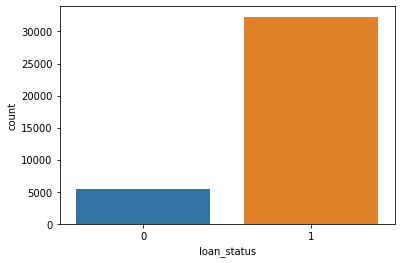

In [31]:
import seaborn as sns
%matplotlib inline
sns.countplot(loans_2007['loan_status'])

# Metrics
- Considering investors are more interested in secure system, where they want to avoid as much potential defaulters as possible, we will use the `Recall` and `Fall-Out` metric. We want to be able to predict as much defaulters as possible.

- False Positive Rate(Fall): "the percentage of the loans that shouldn't be funded that I would fund".
- True Positive Rate(Recall): "the percentage of loans that should be funded that I would fund".

Generally, if we want to reduce false positive rate, true positive rate will also go down. This is because if we want to reduce the risk of false positives, we wouldn't think about funding riskier loans in the first place.

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
lr = LogisticRegression()


cols = loans_2007.columns
train_cols = cols.drop("loan_status")
features = loans_2007[train_cols]
target = loans_2007["loan_status"]



predictions = cross_val_predict(lr, features, target, cv=3) #We will use 3 types of the models to cross validate
predictions = pd.Series(predictions)

# False positives.
fp_filter = (predictions == 1) & (loans_2007["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (loans_2007["loan_status"] == 1)
tp = len(predictions[tp_filter])


# False negatives.
fn_filter = (predictions == 0) & (loans_2007["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (loans_2007["loan_status"] == 0)
tn = len(predictions[tn_filter])
# Rates
tpr = tp  / (tp + fn)
fpr = fp  / (fp + tn)
print(tpr)
print(fpr)

C:\Users\Oluwabusayo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Oluwabusayo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Oluwabusayo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9984268484530676
0.9986179664363277


- Our `false positive rate` is very high.. almost and it should be very low
- Means our models is predicting several 1's instead of 0.. because of the earlier bias in the training data
    - to correct for imbalanced classes. The two main ways are:
        - Use oversampling and undersampling to ensure that the classifier gets input that has a balanced number of each class.
        - Tell the classifier to penalize misclassifications of the less prevalent class more than the other class.
        
Using the second option from above,
    - We can do this by setting the `class_weight` parameter to balanced when creating the LogisticRegression instance. 
    - The penalty means that the logistic regression classifier pays more attention to correctly classifying rows where loan_status is 0. This <b>lowers</b> accuracy when loan_status is 1, but <b>raises</b> accuracy when loan_status is 0.

In [33]:
lr = LogisticRegression(class_weight="balanced")


cols = loans_2007.columns
train_cols = cols.drop("loan_status")
features = loans_2007[train_cols]
target = loans_2007["loan_status"]



predictions = cross_val_predict(lr, features, target, cv=3) #We will use 3 types of the models to cross validate
predictions = pd.Series(predictions)

# False positives.
fp_filter = (predictions == 1) & (loans_2007["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (loans_2007["loan_status"] == 1)
tp = len(predictions[tp_filter])


# False negatives.
fn_filter = (predictions == 0) & (loans_2007["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (loans_2007["loan_status"] == 0)
tn = len(predictions[tn_filter])
# Rates
tpr = tp  / (tp + fn)  # Recall rate
fpr = fp  / (fp + tn)
print(tpr)
print(fpr)

C:\Users\Oluwabusayo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Oluwabusayo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Oluwabusayo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6272286313581542
0.6152023692003948


We can reduce the fpr further with manual penalties

In [34]:
penalty = {
    0: 10,
    1: 1
}

lr = LogisticRegression(class_weight=penalty)
predictions = cross_val_predict(lr, features, target, cv=3)
predictions = pd.Series(predictions)

# False positives.
fp_filter = (predictions == 1) & (loans_2007["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (loans_2007["loan_status"] == 1)
tp = len(predictions[tp_filter])


# False negatives.
fn_filter = (predictions == 0) & (loans_2007["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (loans_2007["loan_status"] == 0)
tn = len(predictions[tn_filter])
# Rates
tpr = tp  / (tp + fn)
fpr = fp  / (fp + tn)
print(tpr)

print(fpr)

C:\Users\Oluwabusayo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Oluwabusayo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Oluwabusayo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.21971683272155218
0.21579466929911156


# Next......
* We can tweak the penalties further.
* We can try models other than a random forest and logistic regression.
* We can use some of the columns we discarded to generate better features.
* We can ensemble multiple models to get more accurate predictions.
* We can tune the parameters of the algorithm to achieve higher performance.